<a href="https://colab.research.google.com/github/EnzoMoraes-full/Beginner-Python-Challengess/blob/main/PCA_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

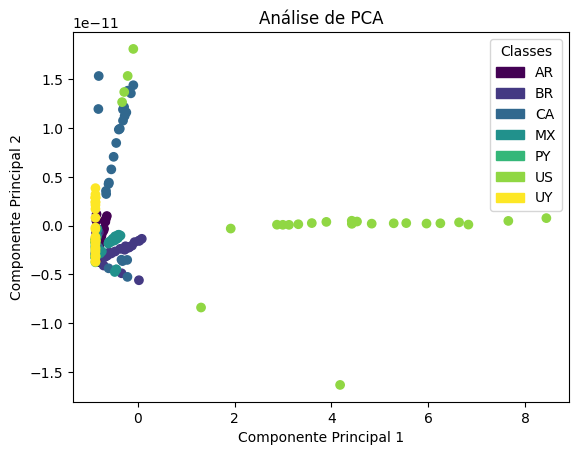

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder

# Carrega o dataset
dataset = pd.read_csv('DatasetPCA/PCAeco.csv')

# Muda de string para float
for column in dataset.columns[1:]:
    dataset[column] = dataset[column].str.replace(',', '').astype(float)

# Cria um dataframe
data = pd.DataFrame(data=dataset)
data['target'] = dataset.País[dataset.index]

# Separa os números dos rótulos
y = data['target'].values
X = data.iloc[:, 1:5].values
#print(X)
#print(y)
'''
Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

'''
# Normalizar os dados
X = (X - np.mean(X)) / np.std(X)

# Aplica o PCA com 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Converte os rótulos para valores numéricos
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Obtem cores únicas para cada classe
num_classes = len(np.unique(y))
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

# Cria um mapeamento de classe para cor
class_color_map = {class_label: color for class_label, color in zip(np.unique(y), colors)}

# Visualiza os resultados
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')

# Adiciona legendas para as classes
legend_handles = [Patch(color=class_color_map[label], label=label) for label in np.unique(y)]

plt.legend(handles=legend_handles, title="Classes")

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de PCA')
plt.show()